
# Building a Network from Wikipedia Pages

* [Pipeline to extract a network from Wikipedia.](https://github.com/VictorNGomes/Directed_Networks_From_Wikipedia_Pages/blob/main/notebooks/Pipeline.ipynb )

* [Week 07 Video 01 - Building a Network from Wikipedia Pages](https://youtu.be/EhOhCdkgmxs)

* [Week 07 Video 02 - Snowballing process to collect Wikipedia pages](https://youtu.be/RdU6Kj9N_ow)

In [1]:
from operator import itemgetter
import networkx as nx
import wikipedia
import matplotlib.pyplot as plt
import seaborn as sns
     

nx.__version__

'3.2.1'

In [2]:
#!pip install scipy==1.8

In [ ]:
SEED = "Loathe (band)".title()
STOPS = ("Liverpool",
         "London")
     

In [4]:
todo_lst = [(0, SEED)] # The SEED is in the layer 0
todo_set = set(SEED) # The SEED itself
done_set = set() # Nothing is done yet

In [5]:
g = nx.DiGraph()
layer, page = todo_lst[0]

In [6]:
%%time
while layer < 2:
  # Remove the name page of the current page from the todo_lst, 
  # and add it to the set of processed pages. 
  # If the script encounters this page again, it will skip over it.
  del todo_lst[0]
  done_set.add(page)
  
  # Show progress
  print(layer, page) 
  
  # Attempt to download the selected page.
  try:
    wiki = wikipedia.page(page)
  except:
    print("Could not load", page)
    layer, page = todo_lst[0]
    continue
  
  for link in wiki.links:
    link = link.title()
    if link not in STOPS and not link.startswith("List Of"):
      if link not in todo_set and link not in done_set:
        todo_lst.append((layer + 1, link))
        todo_set.add(link)
      g.add_edge(page, link)
  layer, page = todo_lst[0]
     

print("{} nodes, {} edges".format(len(g), nx.number_of_edges(g)))
     

0 Loathe (Band)
1 2000 Trees
1 30 Days Of Night (Film)
1 Akira (1988 Film)
1 Akira Yamaoka
1 Allmusic
1 Allmusic (Identifier)
1 Alternative Press (Magazine)
1 Alternative Metal
Could not load Alternative Metal
1 Ambient Music
1 Atlanta
1 Attack Attack! (American Band)
1 Atticus Ross
1 Attila (Metalcore Band)
1 Audiotree
1 Between The Buried And Me
Could not load Between The Buried And Me
1 Blade Runner (Soundtrack)
1 Blood Youth
1 Bury Tomorrow
1 Covid-19 Pandemic
1 Carcer City (Band)
1 Code Orange (Band)
1 Compact Disc
1 Crystal Lake (Band)
1 David Lynch
1 Death Growl
1 Deathcore
Could not load Deathcore
1 Deftones
Could not load Deftones
1 Djent


c:\Users\Gusto\anaconda3\Lib\site-packages\wikipedia\wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file c:\Users\Gusto\anaconda3\Lib\site-packages\wikipedia\wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Could not load Djent
1 Download Festival
1 Dying Wish (Band)
1 Earl Sweatshirt
1 Electronicore
Could not load Electronicore
1 Emmure
1 Erykah Badu
1 Extended Play
1 Fit For An Autopsy
1 Geinoh Yamashirogumi
1 Gel (Band)
1 Ghost (Swedish Band)
1 Gideon (Band)
1 Glassjaw
Could not load Glassjaw
1 Hail The Sun
1 Heavy Music Awards
1 Heavy Metal Music
1 Hellfest
1 Holding Absence
Could not load Holding Absence
1 Hollywood Undead
Could not load Hollywood Undead
1 Issn (Identifier)
1 I Let It In And It Took Everything
1 Industrial Music
1 Instrumental Album
1 Kerrang
1 Kerrang!
1 Knotfest
1 Korn
1 Liverpool
1 London
1 Lotus Eater
1 Melodic Hardcore
1 Melodic Metalcore
1 Merseyside
1 Meshuggah
1 Metal Hammer
1 Metal Hammer Golden Gods Awards
1 Metalcore
1 Michael Jackson
Could not load Michael Jackson
1 Miss May I
Could not load Miss May I
1 Music Week
1 Music Download
1 Nme
1 Nu Metal
Could not load Nu Metal
1 Nu Metalcore
Could not load Nu Metalcore
1 Nuclear Blast
Could not load Nuclear Bl

In [7]:
print("{} nodes, {} edges".format(len(g), nx.number_of_edges(g)))

22847 nodes, 32496 edges


In [8]:

page = 'Loathe'.title()
wiki = wikipedia.page(page)
len(wiki.links)

151

In [9]:
# make a copy of raw graph
original = g.copy()

# remove self loops
g.remove_edges_from(nx.selfloop_edges(g))

# identify duplicates like that: 'network' and 'networks'
duplicates = [(node, node + "s") 
              for node in g if node + "s" in g
             ]

for dup in duplicates:
  # *dup is a technique named 'unpacking'
  g = nx.contracted_nodes(g, *dup, self_loops=False)

print(duplicates)

duplicates = [(x, y) for x, y in 
              [(node, node.replace("-", " ")) for node in g]
                if x != y and y in g]
print(duplicates)

for dup in duplicates:
  g = nx.contracted_nodes(g, *dup, self_loops=False)

# nx.contracted creates a new node/edge attribute called contraction
# the value of the attribute is a dictionary, but GraphML
# does not support dictionary attributes
nx.set_node_attributes(g, 0,"contraction")
nx.set_edge_attributes(g, 0,"contraction")
     
print("{} nodes, {} edges".format(len(g), nx.number_of_edges(g)))

[('Compact Disc', 'Compact Discs'), ('Death Growl', 'Death Growls'), ('Film Score', 'Film Scores'), ('Japanese Film', 'Japanese Films'), ('Silent Hill', 'Silent Hills'), ('Synthesizer', 'Synthesizers'), ('Golden Globe', 'Golden Globes'), ('Uk Albums Chart', 'Uk Albums Charts'), ('Guitar Riff', 'Guitar Riffs'), ('Timeline Of Covid-19 Pandemic', 'Timeline Of Covid-19 Pandemics'), ('Grammy Award', 'Grammy Awards'), ('8-Track Cartridge', '8-Track Cartridges'), ('Cd', 'Cds'), ('Edison Disc Record', 'Edison Disc Records'), ('Vinyl Record', 'Vinyl Records'), ('Hollywood Film', 'Hollywood Films'), ('Blast Beat', 'Blast Beats'), ('Soul Train Music Award', 'Soul Train Music Awards'), ('Ep', 'Eps'), ('Music Festival', 'Music Festivals'), ('Uk Singles Chart', 'Uk Singles Charts'), ('Classical Element', 'Classical Elements'), ('Pedal Point', 'Pedal Points'), ('Riff', 'Riffs'), ('Uk Album Chart', 'Uk Album Charts'), ('Carbohydrate', 'Carbohydrates'), ('Corn Kernel', 'Corn Kernels'), ('Tamale', 'Tama

In [10]:
degree = [drg for node , drg in g.degree()]
print(f'Max degree : {max(degree)}' )
print(f'Min degree : {min(degree)}' )

Max degree : 2305
Min degree : 1


<Axes: ylabel='Count'>

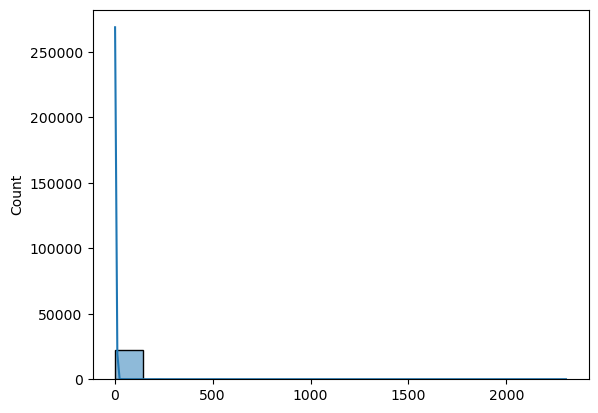

In [11]:
sns.histplot(data=degree, kde=True)

In [12]:
#filter nodes with degree greater than 2
#core decompo = 3 
core = [node for node, drg in dict(g.degree()).items() if drg > 2 ]
degrees = [drg for node, drg in dict(g.degree()).items() if drg > 2 ]

In [13]:
subgraf_g = nx.subgraph(g,core)
print(f'Nodes: {len(subgraf_g)} edges: {nx.number_of_edges(subgraf_g)}')
nx.write_graphml(subgraf_g, "network_analysis.graphml")

Nodes: 1703 edges: 8625


In [14]:
print("Nodes removed: {:.2f}%".format(100*(1 - len(subgraf_g)/len(g))))
print("Edges removed: {:.2f}%".format(100*(1 - nx.number_of_edges(subgraf_g)/nx.number_of_edges(g))))
print("Original Average of edges by node: {:.2f}".format(nx.number_of_edges(g)/len(g)))
print("Subgraph Average of edges by node: {:.2f}".format(nx.number_of_edges(subgraf_g)/len(subgraf_g)))

Nodes removed: 92.52%
Edges removed: 73.41%
Original Average of edges by node: 1.42
Subgraph Average of edges by node: 5.06


In [15]:
import numpy as np
from collections import  Counter

In [16]:
Counter(degrees)

Counter({3: 663,
         4: 366,
         5: 166,
         7: 127,
         6: 98,
         8: 52,
         9: 37,
         10: 23,
         12: 18,
         11: 13,
         13: 10,
         14: 7,
         19: 6,
         15: 5,
         17: 5,
         21: 4,
         227: 3,
         27: 3,
         20: 3,
         110: 2,
         18: 2,
         23: 2,
         218: 2,
         26: 2,
         488: 2,
         136: 1,
         184: 1,
         470: 1,
         133: 1,
         75: 1,
         58: 1,
         63: 1,
         670: 1,
         854: 1,
         116: 1,
         778: 1,
         137: 1,
         102: 1,
         53: 1,
         109: 1,
         2076: 1,
         191: 1,
         700: 1,
         107: 1,
         1375: 1,
         1516: 1,
         181: 1,
         163: 1,
         762: 1,
         284: 1,
         36: 1,
         281: 1,
         30: 1,
         32: 1,
         531: 1,
         1066: 1,
         50: 1,
         507: 1,
         42: 1,
         884: 1

In [17]:
top_indegree = sorted(dict(subgraf_g.in_degree()).items(),
                      reverse=True, key=itemgetter(1))[:100]

print("\n".join(map(lambda t: "{} {}".format(*reversed(t)), top_indegree)))

37 Issn (Identifier)
32 Metalcore
31 Heavy Metal Music
31 Allmusic
29 Wayback Machine
27 Kerrang!
27 Nu Metal
26 Billboard (Magazine)
24 Nme
23 Hardcore Punk
23 Covid-19 Pandemic
22 Punk Rock
21 Metal Hammer
21 Pitchfork (Website)
21 The New York Times
20 Youtube
20 Alternative Rock
20 Grunge
19 Post-Hardcore
19 Rolling Stone
19 Rock Music
19 The Guardian
19 Hard Rock
18 Slipknot (Band)
18 Alternative Metal
18 Loudwire
18 Loathe (Band)
17 Electronic Music
17 Blabbermouth.Net
17 Alternative Press (Magazine)
17 Billboard 200
17 Discogs
16 Korn
16 Thrash Metal
16 Twitter
15 Bbc
15 Deathcore
15 Emo
15 Official Charts Company
15 Black Metal
14 Allmusic (Identifier)
14 Grammy Award
14 S2Cid (Identifier)
14 Of Mice & Men (Band)
14 Bullet For My Valentine
14 Hip Hop Music
14 Grindcore
14 Rock Sound
14 Enter Shikari
13 Metallica
13 Electronica
13 Industrial Metal
13 Slayer
13 While She Sleeps
13 Electronicore
13 Download Festival
13 Limp Bizkit
13 Ambient Music
13 Progressive Rock
13 Tweet (Soc

<Axes: ylabel='Count'>

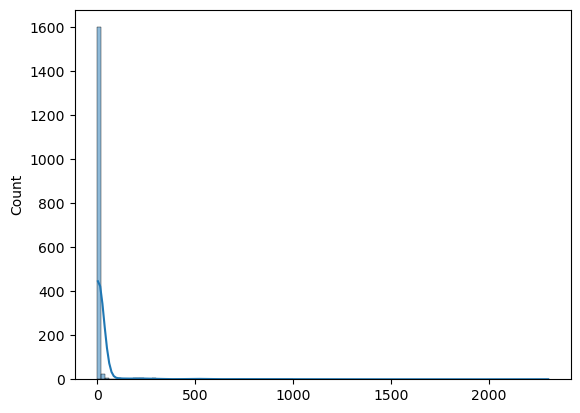

In [18]:
sns.histplot(data=degrees,kde = True,bins=np.histogram_bin_edges(degrees,50,range = (0,1000)))

# degree_centrality

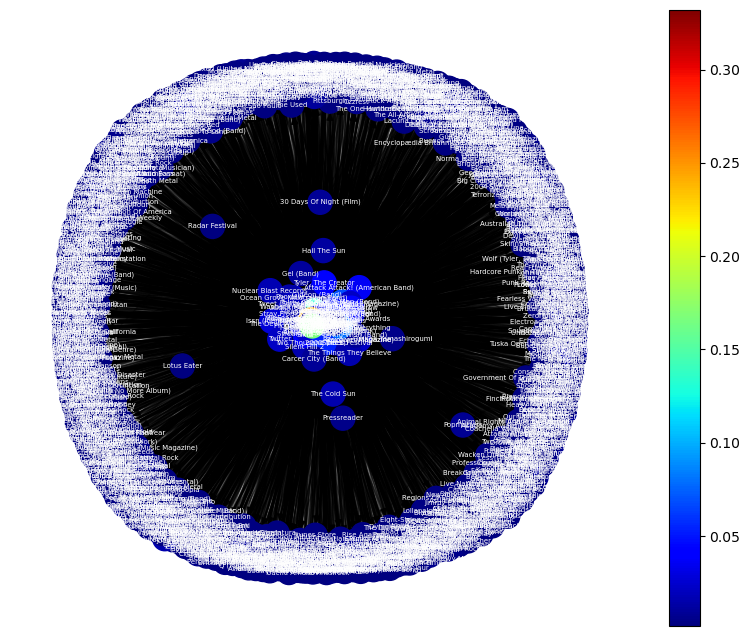

In [19]:
#the degree centrality of network(g)
fig, ax = plt.subplots(1,1,figsize=(10,8))

# layout position
pos = nx.spring_layout(subgraf_g,seed=8375,k=0.2)
# color of nodes
color = list(dict(nx.degree_centrality(subgraf_g)).values())

# draw edges
nx.draw_networkx_edges(subgraf_g,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(subgraf_g,
                 pos=pos,
                 node_color=color,
                 cmap=plt.cm.jet,
                 ax=ax)

# draw labels
nx.draw_networkx_labels(subgraf_g, pos=pos,
                        font_color='white',
                        font_size = 5, 
                        ax=ax)


plt.axis("off")
plt.colorbar(nodes)
plt.savefig('degree_centrality.png', transparent=True,dpi=300)
plt.show()

# - Closeness Centrality

In [20]:
nx.closeness_centrality(g)

{'Loathe (Band)': 0.0013501235473775972,
 '2000 Trees': 0.0009915661462707598,
 '30 Days Of Night (Film)': 0.0010089869333618183,
 'Akira (1988 Film)': 0.0012760661376058301,
 'Akira Yamaoka': 0.001008092248708606,
 'Allmusic': 0.0019638160689128686,
 'Allmusic (Identifier)': 0.00162595523985259,
 'Alternative Press (Magazine)': 0.0014132134327690736,
 'Alternative Metal': 0.0014892259064522991,
 'Ambient Music': 0.0015669827700133768,
 'Atlanta': 0.0011868160480539396,
 'Attack Attack! (American Band)': 0.001209710698450327,
 'Atticus Ross': 0.0011543041015747394,
 'Attila (Metalcore Band)': 0.0012548866166497167,
 'Audiotree': 0.0009981111373352533,
 'Between The Buried And Me': 0.0010681344432485456,
 'Blade Runner (Soundtrack)': 0.0011499151125953678,
 'Blood Youth': 0.0011201024985651176,
 'Bury Tomorrow': 0.0013264371693534288,
 'Covid-19 Pandemic': 0.0017895128675300695,
 'Carcer City (Band)': 0.0010917966592511976,
 'Code Orange (Band)': 0.0013936759198736486,
 'Compact Disc': 

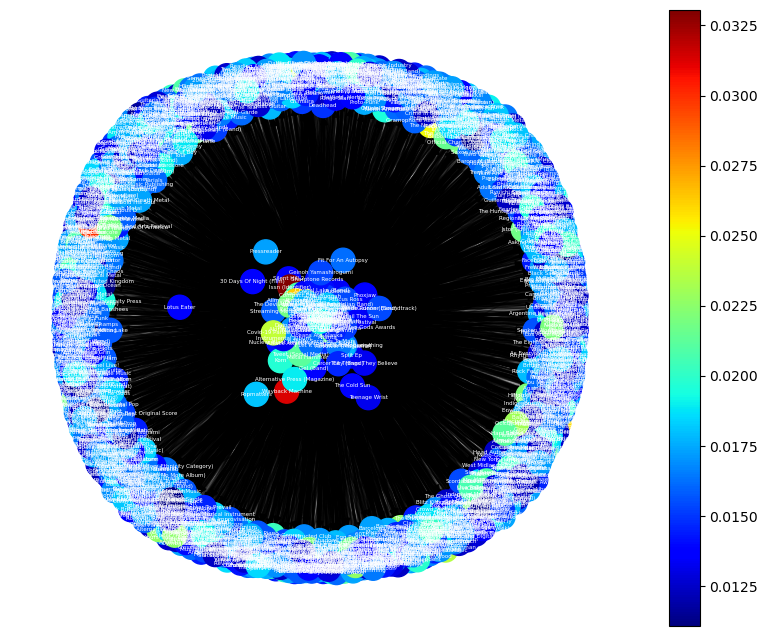

In [21]:

# the closeness centrality of network(g)
fig, ax = plt.subplots(1,1,figsize=(10,8))

# layout position
pos = nx.spring_layout(subgraf_g,seed=123456789,k=0.3)
# color of nodes
color = list(dict(nx.closeness_centrality(subgraf_g)).values())

# draw edges
nx.draw_networkx_edges(subgraf_g,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(subgraf_g,
                 pos=pos,
                 node_color=color,
                 cmap=plt.cm.jet,
                 ax=ax)

# draw labels
nx.draw_networkx_labels(subgraf_g, pos=pos,
                        font_color='white', ax=ax,font_size = 4)


plt.axis("off")
plt.colorbar(nodes)
plt.savefig('closeness_centrality.png', transparent=True,dpi=600)
plt.show()

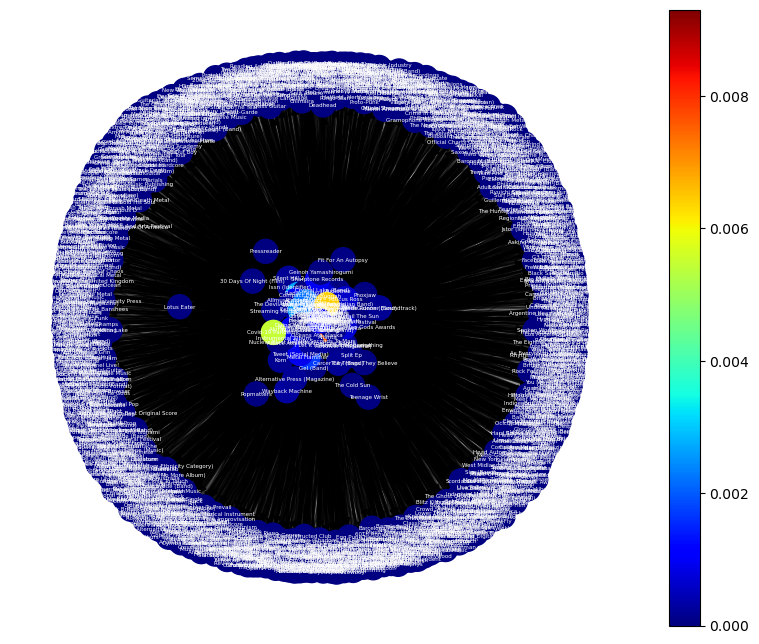

In [22]:
# the eigenvector centrality of network(g)
fig, ax = plt.subplots(1,1,figsize=(10,8))

# layout position
pos = nx.spring_layout(subgraf_g,seed=123456789,k=0.3)
# color of nodes
color = list(dict(nx.betweenness_centrality(subgraf_g)).values())

# draw edges
nx.draw_networkx_edges(subgraf_g,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(subgraf_g,
                 pos=pos,
                 node_color=color,
                 cmap=plt.cm.jet,
                 ax=ax)

# draw labels
nx.draw_networkx_labels(subgraf_g, pos=pos,
                        font_color='white', ax=ax,font_size = 4)


plt.axis("off")
plt.colorbar(nodes)
plt.savefig('betweenness_centrality.png', transparent=True,dpi=600)
plt.show()

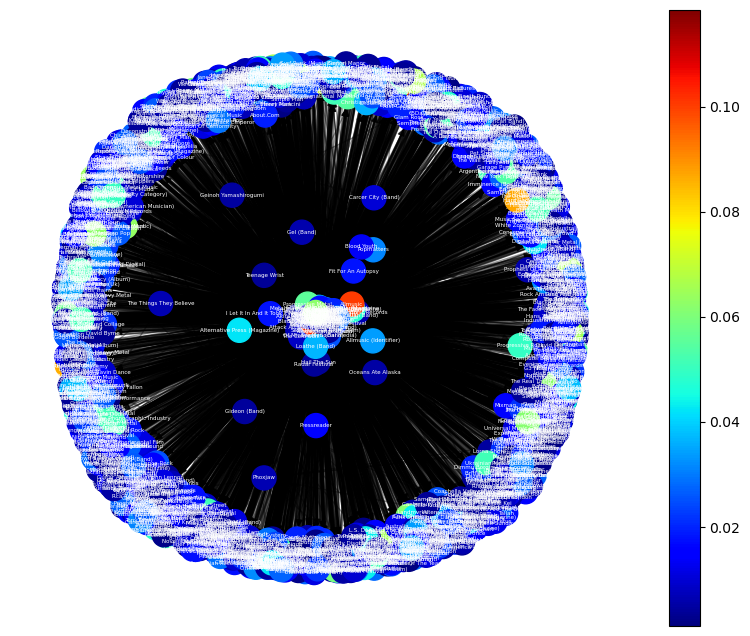

In [23]:
# the eigenvector centrality of network(g)
fig, ax = plt.subplots(1,1,figsize=(10,8))

# layout position
pos = nx.spring_layout(g,seed=123456789,k=0.3)
# color of nodes
color = list(dict(nx.eigenvector_centrality(subgraf_g)).values())

# draw edges
nx.draw_networkx_edges(subgraf_g,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(subgraf_g,
                 pos=pos,
                 node_color=color,
                 cmap=plt.cm.jet,
                 ax=ax)

# draw labels
nx.draw_networkx_labels(subgraf_g, pos=pos,
                        font_color='white', ax=ax,font_size = 4)


plt.axis("off")
plt.colorbar(nodes)
plt.savefig('eigenvector_centrality.png', transparent=True,dpi=600)
plt.show()

In [24]:
import pandas as pd

In [25]:
bc = pd.Series(nx.betweenness_centrality(subgraf_g))
dc = pd.Series(nx.degree_centrality(subgraf_g))
ec = pd.Series(nx.eigenvector_centrality(subgraf_g))
cc = pd.Series(nx.closeness_centrality(subgraf_g))

df = pd.DataFrame.from_dict({"Betweenness": bc,
                            "Degree": dc,
                            "EigenVector": ec,
                            "Closeness": cc})
df.reset_index(inplace=True,drop=True)
df.head()

,Betweenness,Degree,EigenVector,Closeness
0,0.0,0.002938,0.012263,0.019574
1,0.0,0.002938,0.017522,0.016322
2,0.0,0.005288,0.033952,0.016991
3,0.0,0.002350,0.027868,0.017131
4,0.0,0.004700,0.025452,0.021044


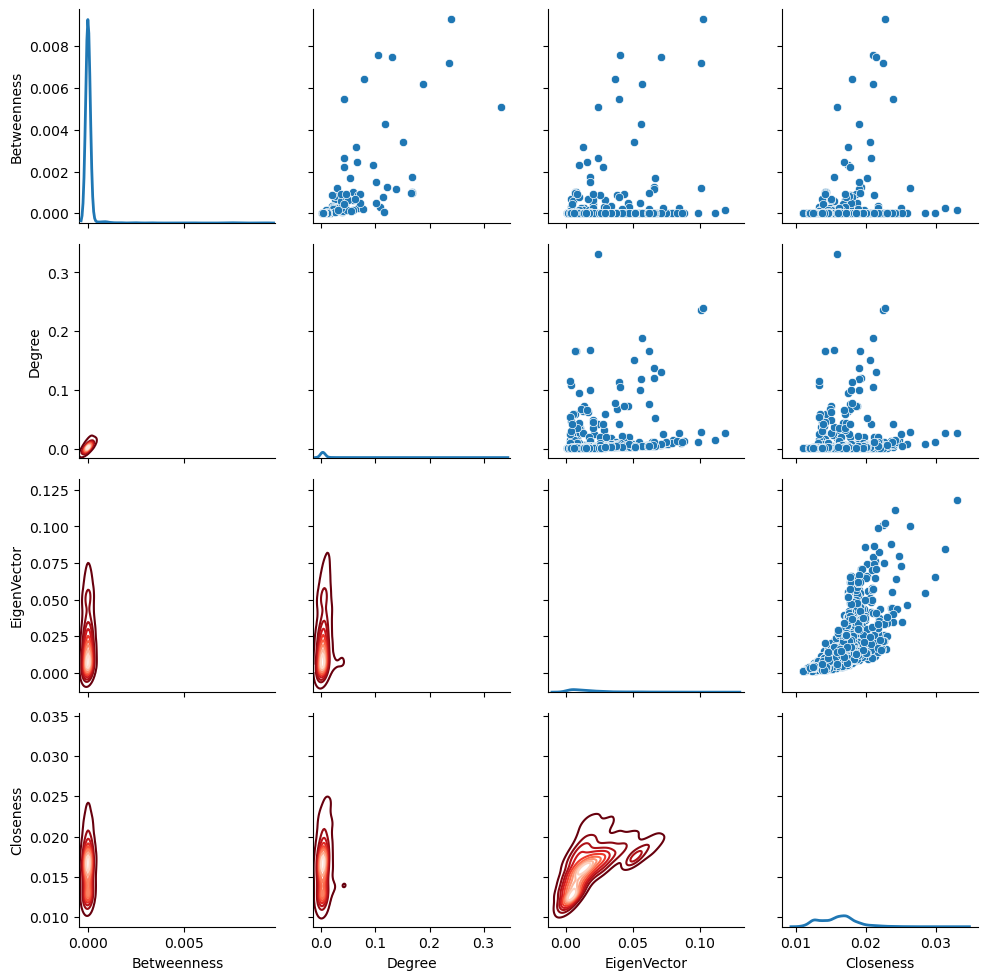

In [26]:
fig = sns.PairGrid(df)
fig.map_upper(sns.scatterplot)
fig.map_lower(sns.kdeplot, cmap="Reds_r")
fig.map_diag(sns.kdeplot, lw=2, legend=False)


plt.savefig('all.png', transparent=True,dpi=800,bbox_inches="tight")
plt.show()

In [27]:
# How many k-cores does this network have?
set([v for k,v in nx.core_number(subgraf_g).items()])

{3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14}

In [28]:
import matplotlib.patches as mpatches

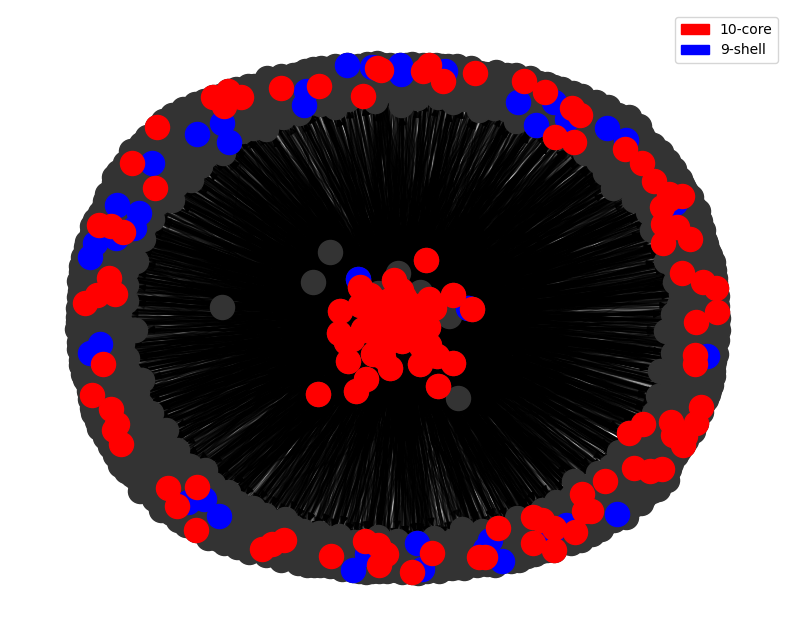

In [29]:
# the degree of network(g2)
fig, ax = plt.subplots(1,1,figsize=(10,8))

# Find k-cores
g2_core_9 = nx.k_shell(subgraf_g, 9)
g2_core_10 = nx.k_core(subgraf_g, 10)

# layout position
pos = nx.spring_layout(subgraf_g,seed=123456789,k=0.3)

# draw edges
nx.draw_networkx_edges(subgraf_g,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(subgraf_g,
                 pos=pos,
                 node_color="#333333")

# draw nodes
nodes = nx.draw_networkx_nodes(g2_core_9,
                 pos=pos,
                 node_color="blue")

nodes = nx.draw_networkx_nodes(g2_core_10,
                 pos=pos,
                 node_color="red")

# static legend
red_patch = mpatches.Patch(color='red', label='10-core')
blue_patch = mpatches.Patch(color='blue', label='9-shell')
plt.legend(handles=[red_patch,blue_patch])

plt.axis("off")
plt.savefig('k-core_sociopatterns.png', transparent=True,dpi=600)
plt.show()

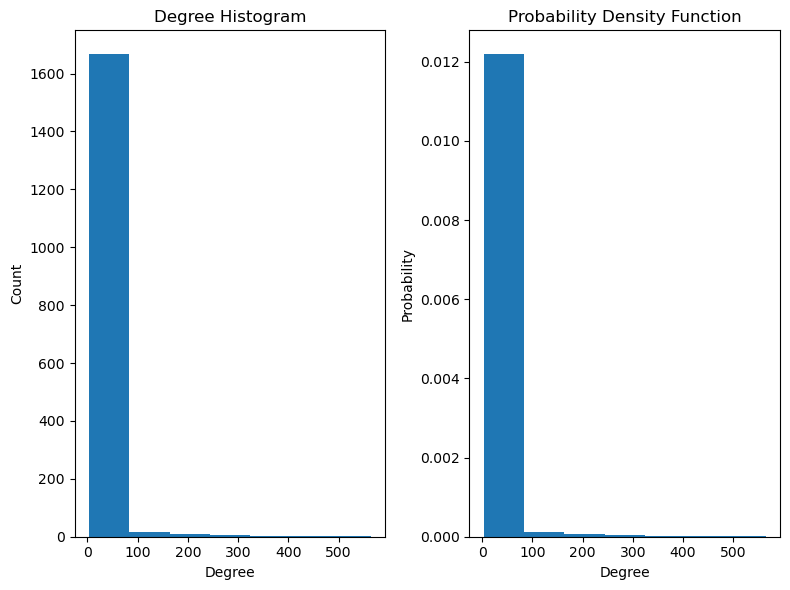

In [30]:
plt.style.use("default")
# degree sequence
degree_sequence = sorted([d for n, d in subgraf_g.degree()], reverse=True)  

fig, ax = plt.subplots(1,2,figsize=(8,6))

# all_data has information about degree_sequence and the width of each bin
all_data = ax[0].hist(degree_sequence,bins=7)
ax[1].hist(degree_sequence,bins=7,density=True)

ax[0].set_title("Degree Histogram")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Degree")

ax[1].set_title("Probability Density Function")
ax[1].set_ylabel("Probability")
ax[1].set_xlabel("Degree")

plt.tight_layout()
plt.show()

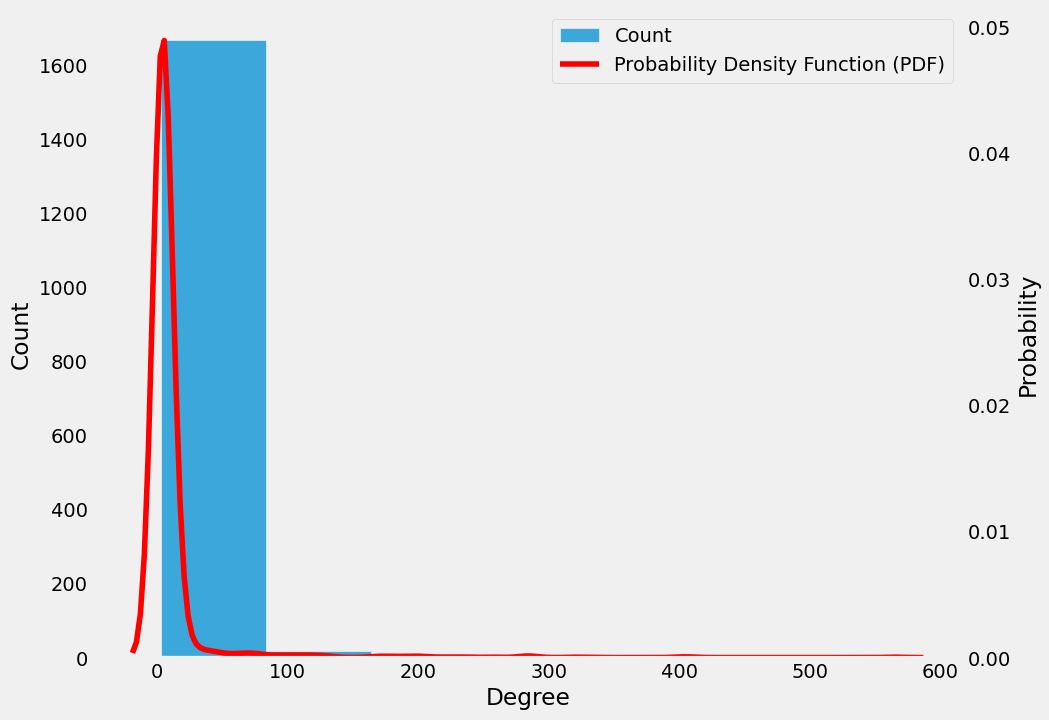

In [31]:
plt.style.use("fivethirtyeight")
#plt.style.use("default")

fig, ax = plt.subplots(1,1,figsize=(10,8))

sns.histplot(degree_sequence,bins=7,label="Count",ax=ax)
ax2 = ax.twinx()
sns.kdeplot(degree_sequence,color='r',label="Probability Density Function (PDF)",ax=ax2)

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(False)
ax2.grid(False)
ax.set_xlabel("Degree")
ax2.set_ylabel("Probability")

plt.savefig('probability_density_function.png', transparent=True,dpi=600,bbox_inches="tight")
plt.show()

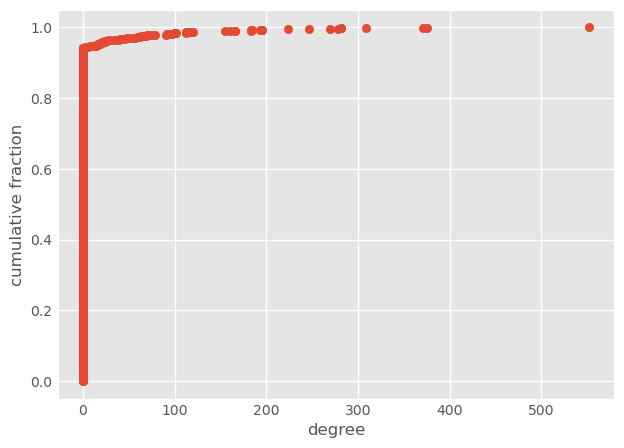

In [32]:
plt.style.use("ggplot")

# Another way to visualize the cumulative distribution
def ecdf(data):
    return np.sort(data), np.arange(1, len(data) + 1) / len(data)

def ecdf_degree(G):
    """ECDF of degree."""
    num_neighbors = [len(list(G.neighbors(n))) for n in G.nodes()]
    x, y = ecdf(num_neighbors)
    plt.scatter(x, y)
    plt.xlabel("degree")
    plt.ylabel("cumulative fraction")
     

#
# insighs
# cdf(1) - almore 40% of vertices has degree 1
# cdf(2) P(degree <= 2) - 50% of vertices has at least degree 2 or less
# cdf(6) P(degree <= 6) - more than 95% of vertices has at least degree 6 or less
ecdf_degree(subgraf_g)